In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!pip3 install ipympl


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: pip install --upgrade pip


Read in raw data file into pandas

In [3]:
filename = "scan1.csv"
df = pd.read_csv(filename)

Turn the scan columns into a numpy array

In [4]:
range_cols = [col for col in df.columns if 'ranges' in col]
nparr = df[range_cols].to_numpy()

Grab each group of N columns into a new single column which is an average. This reduces noise. This function will take a single row (list) and distill it by averaging groups of N values.

In [5]:
def distill(a):
    N = 5
    limit0 = N * (a.size//N)
    out = np.zeros((a.size + N -1)//N)
    out[:limit0//N] = a[:limit0].reshape(-1,N).mean(1)
    out[limit0//N:] = a[limit0:].mean()
    return out

Now apply it to all the readings. We end up with a list of lists. First dimension is the reading, and second dimension is the angle. 

In [6]:
readings = [distill(a) for a in nparr]
readings = np.array(readings)

Filter all cells to reflect whether they are a good reading or not. 

In [7]:
low_limit = 0.05
high_limit = 25.0
readings_mask = (readings > low_limit) & (readings < high_limit)

Visualize it as a circle

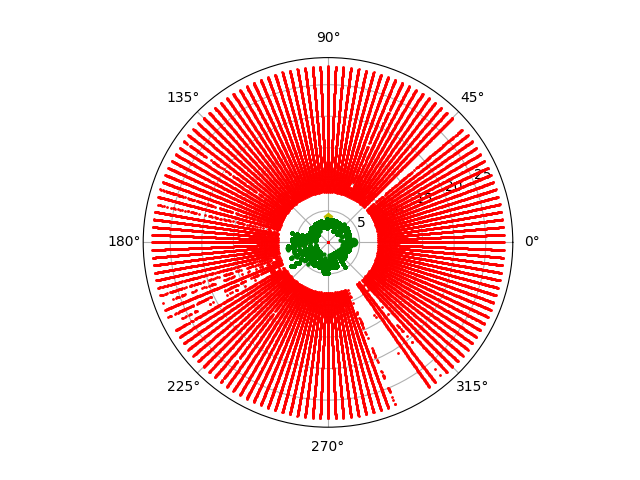

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
  
# setting the axes projection as polar
plt.axes(projection = 'polar')
  
# setting the radius
r = 3
# creating an array containing the
# radian values

rads = np.arange(0, (2 * np.pi), 2 * np.pi / readings_mask[0].size)

# Indicate directions: green is forward, red is backward, yellow is 90 degrees. This helps understand
# the graph
plt.polar(0, 4, 'go')
plt.polar(np.pi, 4, 'ro')
plt.polar(np.pi/2, 4, 'yp')

# plotting the data
for rad in np.arange(0, readings_mask.shape[1]):
    for read in range(0, readings_mask.shape[0]):
        angle = rad * (2 * np.pi)/readings_mask.shape[1]
        plt.polar(angle, 8+read/10.0 if readings_mask[read, rad] else 0, markersize=2, marker='.', color='red')
        plt.polar(angle, 2+readings[read, rad], marker='.', markersize=4, color='green')
# display the Polar plot
plt.show()
